In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU
from keras.optimizers import Adam
from keras.models import Model

In [2]:
plt.rcParams['figure.figsize'] = [6, 3]

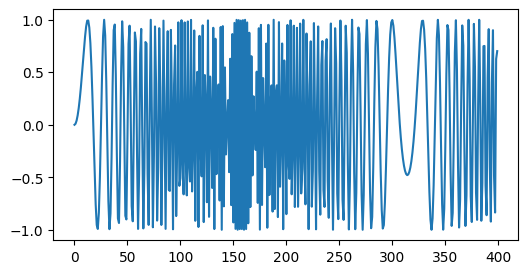

In [9]:
#original data
series = np.sin((0.1 * np.arange(400)) ** 2)
plt.plot(series)

In [14]:
T = 10
D = 1
M = 10
X = []
Y = []

for t in range(len(series) - T) :
    x = series[t: t + T]
    X.append(x)
    Y.append(series[t + T])
    
X = np.array(X)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(390, 10) (390,)


In [15]:
#Autoregressive Linear Model
i = Input(shape=(T,))
x = Dense(1) (i)
model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')
hist1 = model.fit(
    X[:N//2], Y[:N//2], 
    validation_data=(
        X[N//2:], 
        Y[N//2:]
    ),
    epochs = 100
)

Epoch 1/100
7/7 [==============================] - 0s 21ms/step - loss: 1.5624 - val_loss: 0.6149
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6776 - val_loss: 0.7568
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6704 - val_loss: 0.7047
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5699 - val_loss: 0.6924
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5865 - val_loss: 0.6332
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5509 - val_loss: 0.5893
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5047 - val_loss: 0.5937
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5284 - val_loss: 0.6164
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5177 - val_loss: 0.6517
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5104 - val_loss: 0.6695
Epoch 11/100
7/7 [==========

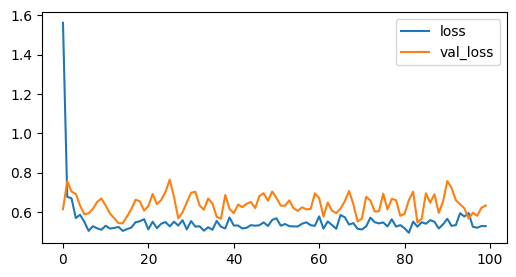

In [17]:
plt.plot(hist1.history['loss'], label = 'loss')
plt.plot(hist1.history['val_loss'], label = 'val_loss')
plt.legend()

In [18]:
#1 step prediction- WRONG WAY
validation_targets1 = Y[N//2:]
validation_predictions1 = []

i = N//2

while (len(validation_predictions1) < len(validation_targets1)) :
    x = X[i].reshape(1, -1)
    p = model.predict(x).reshape(1)
    validation_predictions1.append(p)
    i += 1

1/1 [==============================] - 0s 17ms/step


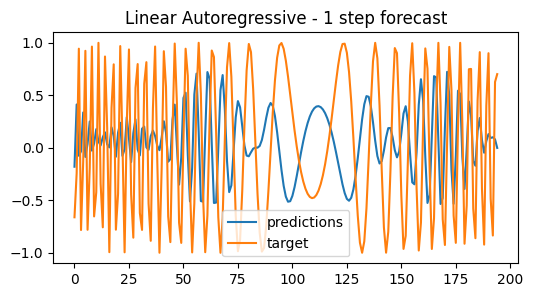

In [26]:
plt.plot(validation_predictions1, label = 'predictions')
plt.plot(validation_targets1, label = 'target')
plt.title('Linear Autoregressive - 1 step forecast')
plt.legend()

In [31]:
#multistep forecast
validation_targets2 = Y[N//2:]
validation_predictions2 = []

#last train input
last_x = X[N//2]  #1D array of length T

while (len(validation_predictions2) < len(validation_targets2)) :
    x = last_x.reshape(1, -1)
    p = model.predict(x).reshape(1)
    validation_predictions2.append(p)
    
    last_x = np.roll(last_x, shift = -1)
    last_x[-1] = p

1/1 [==============================] - 0s 15ms/step


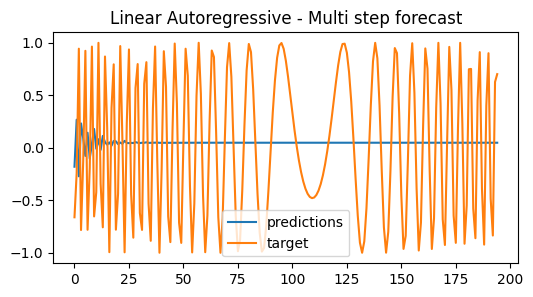

In [32]:
plt.plot(validation_predictions2, label = 'predictions')
plt.plot(validation_targets2, label = 'target')
plt.title('Linear Autoregressive - Multi step forecast')
plt.legend()

In [52]:
X = X.reshape(-1, T, D)

i = Input(shape = (T, D))
x = SimpleRNN(M) (i)
x = Dense(1) (x)

model2 = Model(i, x)
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [53]:
X.shape

(390, 10, 1)

In [54]:
model2.compile(
    optimizer=Adam(learning_rate=0.05), 
    loss='mse'
)

hist2 = model2.fit(
    X[:N//2], Y[:N//2], 
    validation_data = (
        X[N//2:], 
        Y[N//2:]
    ),
    epochs = 100
)

Epoch 1/100
7/7 [==============================] - 1s 29ms/step - loss: 0.5984 - val_loss: 0.6808
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4942 - val_loss: 0.6078
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4500 - val_loss: 0.5506
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3694 - val_loss: 0.5081
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3710 - val_loss: 0.6297
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3196 - val_loss: 0.4112
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2326 - val_loss: 0.4240
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1970 - val_loss: 0.3789
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2289 - val_loss: 0.3206
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2107 - val_loss: 0.3505
Epoch 11/100
7/7 [==========

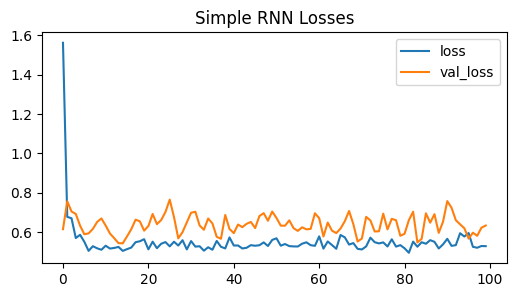

In [55]:
plt.plot(hist1.history['loss'], label = 'loss')
plt.plot(hist1.history['val_loss'], label = 'val_loss')
plt.title('Simple RNN Losses')
plt.legend()

In [56]:
X[0].reshape(1, T, D).shape

(1, 10, 1)

In [57]:
#1 step prediction- WRONG WAY
validation_targets3 = Y[N//2:]
validation_predictions3 = []

i = N//2

while (len(validation_predictions3) < len(validation_targets3)) :
    x = X[i].reshape(1, T, -1)
    p = model2.predict(x).reshape(1)
    validation_predictions3.append(p)
    i += 1

1/1 [==============================] - 0s 15ms/step


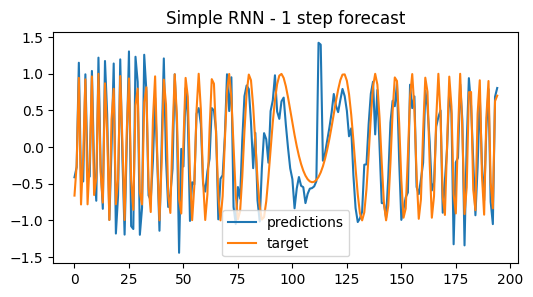

In [58]:
plt.plot(validation_predictions3, label = 'predictions')
plt.plot(validation_targets3, label = 'target')
plt.title('Simple RNN - 1 step forecast')
plt.legend()

In [59]:
#multistep forecast
validation_targets4 = Y[N//2:]
validation_predictions4 = []

#last train input
last_x = X[N//2]  #2D array of length T x D

while (len(validation_predictions4) < len(validation_targets4)) :
    x = last_x.reshape(1, T, D)
    p = model2.predict(x)  # NxK
    validation_predictions4.append(p.reshape(1))
    
    last_x = np.roll(last_x, shift = -1)
    last_x[-1] = p

1/1 [==============================] - 0s 15ms/step


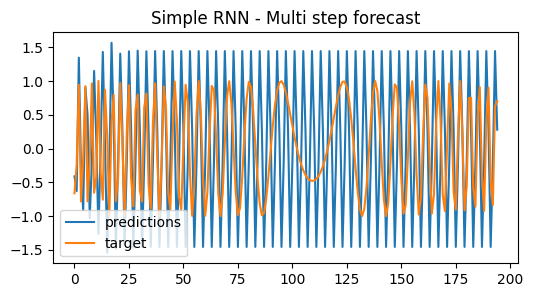

In [60]:
plt.plot(validation_predictions4, label = 'predictions')
plt.plot(validation_targets4, label = 'target')
plt.title('Simple RNN - Multi step forecast')
plt.legend()